In [1]:
import numpy as np
import scipy.sparse as sparse
import scipy
import scipy.optimize as opt
import matplotlib.pyplot as plt
import generate_constant_matrices as mat_gen
import generate_proj_mat as gen_proj

In [140]:
N_omega = 301
N_z = 51
omega = np.linspace(-3, 3, N_omega)
z = np.linspace(0, 0.4, N_z)
delta_omega = np.abs(omega[1] - omega[0])
delta_z = np.abs(z[1] - z[0])
vp = 1
a = 1.61/1.13
vs = vp / (1 + 2 * a * vp / z[-1])
delta_v = vp*vs/(vp - vs)

In [141]:
dynamics_matrices = mat_gen.get_dynamics_matrices(N_omega, omega, vp, z)

In [142]:
# Can be used as part of test to see if constraint respected. 
# See if the diagonal of the computed constraint is equal to the diagonal of the 
# matrix exponential
beta = 20 * delta_omega * np.exp(-((omega + omega[:,np.newaxis])**2)/0.1)
delta_k = np.diag((1/delta_v)*1.j*omega)
Q_plus = delta_k + beta
green_f = scipy.linalg.expm(delta_k*z[-1])
W_plus = np.array([scipy.linalg.expm(Q_plus * z[i]) for i in range(N_z)]).reshape(N_z*N_omega, N_omega)
X = np.concatenate((np.concatenate((np.zeros((2*N_z*N_omega, N_omega)), W_plus)), beta))

In [143]:
test_result = delta_z*X.conj().T@dynamics_matrices[-1]@X
real_green_f = 2*np.real(green_f)
real_prop = 2*np.real(W_plus[(N_z - 1)*N_omega:])

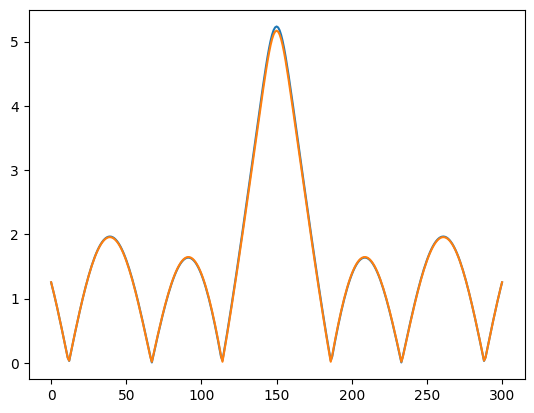

In [144]:
# Works on diagonal, which is good enough
plt.plot(np.abs(np.diag(test_result + real_green_f,k = 0)))
plt.plot(np.abs(np.diag(real_prop, k = 0)))

/home/jiaqi/.local/share/virtualenvs/optimal_pumps-vxukOnVz/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


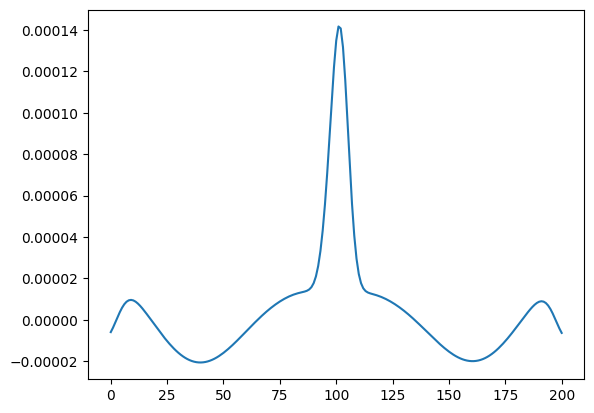

In [80]:
plt.plot(np.diag(W_plus[(N_z - 1)*N_omega:] - (test_result + green_f)))

In [86]:
sum(np.abs(np.imag(np.diag(test_result))))

0.0011258835304537099

In [5]:
quad_basic_herm_proj, quad_basic_antiherm_proj = mat_gen.get_proj_quad_basic(N_omega, N_z)
lin_basic_herm_proj, lin_basic_antiherm_proj = mat_gen.get_proj_lin_basic(N_omega, N_z)

In [6]:
A = sparse.csr_matrix(np.array([[1,2],[3,4]]))
B = sparse.csr_matrix(())
A.resize((2, 4))
A.toarray()

array([[1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [3, 4, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [28]:
projections = gen_proj.diag_proj_unity(N_omega, N_proj)

In [3]:
list_proj = mat_gen.get_lin_proj_mat(N_z, N_omega, N_proj, real=False)

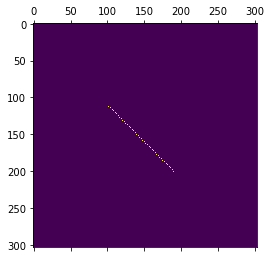

In [4]:
plt.matshow(np.abs(list_proj[0][62].toarray())[61*N_omega:, 61*N_omega:])